In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
import nltk
import regex as re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
nlp=spacy.load('en_core_web_sm')

In [3]:
data=pd.read_csv('bbc_news_20220307_20240703 2.csv')
data.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


## Understanding the data

In [4]:
data.shape

(35860, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35860 entries, 0 to 35859
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        35860 non-null  object
 1   pubDate      35860 non-null  object
 2   guid         35860 non-null  object
 3   link         35860 non-null  object
 4   description  35860 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [6]:
data.isnull().sum()

title          0
pubDate        0
guid           0
link           0
description    0
dtype: int64

In [7]:
data['description'][0]

'The Ukrainian president says the country will not forgive or forget those who murder its civilians.'

## Cleaning and preprocessing the text

In [8]:
def preprocessed_text(text):
    text = re.sub(r'\W', ' ', text) #Replacing any character that is not a word or a digit or underscore with ''.
    text=text.lower() #Converts all the words to lower case
    text=text.split() #Splitting the text into list of words
    lemma=[]
    doc=nlp(' '.join(text))
    for token in doc:
        lemma.append(token.lemma_)
    
    text=' '.join(lemma)
    return text
    

In [9]:
data['description'][2]

"One of the world's biggest fertiliser firms says the conflict could deliver a shock to food supplies."

In [10]:
preprocessed_text(data['description'][2])

'one of the world s big fertiliser firm say the conflict could deliver a shock to food supply'

In [11]:
#Applying it on the dataset
data['cleaned_description']=data['description'].apply(preprocessed_text)

In [12]:
data.head()

,title,pubDate,guid,link,description,cleaned_description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,the ukrainian president say the country will n...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",jeremy bowen be on the frontline in irpin as r...
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,one of the world s big fertiliser firm say the...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,the parent of the manchester arena bombing s y...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,consumer be feel the impact of high energy cos...


## Using VADER for finding the sentiment of each Description

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
sia=SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores(data['description'][2])

{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5994}

In [16]:
# The compound score is what we need

In [17]:
def sentiment_score(text):
    score=sia.polarity_scores(text)['compound']
    return score

In [18]:
sentiment_score(data['cleaned_description'][0])

-0.7048

In [19]:
data['sentiment_score']=data['cleaned_description'].apply(sentiment_score)

In [20]:
data.head()

,title,pubDate,guid,link,description,cleaned_description,sentiment_score
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,the ukrainian president say the country will n...,-0.7048
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",jeremy bowen be on the frontline in irpin as r...,-0.3400
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,one of the world s big fertiliser firm say the...,-0.5994
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,the parent of the manchester arena bombing s y...,-0.7184
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,consumer be feel the impact of high energy cos...,0.2732


/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='sentiment_score', ylabel='Density'>

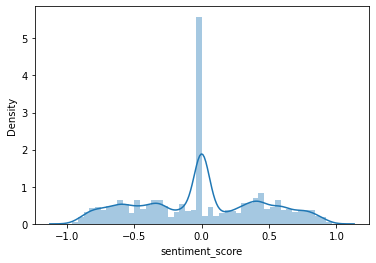

In [30]:
sns.distplot(data['sentiment_score'])

In [31]:
#Checking for normality of the scores

In [32]:
import scipy.stats as stats

In [33]:
stats.shapiro(data['sentiment_score'])

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9705069065093994, pvalue=0.0)

In [34]:
#Since the P-value of the test is 0, we Reject the null hypothesis.

In [21]:
#creating a category for the positive and the negative sentiments

In [22]:
data['Category']=data['sentiment_score'].apply(lambda x: 'Pos' if x>0 else ('Neg' if x<0 else 'Neu'))

<AxesSubplot: >

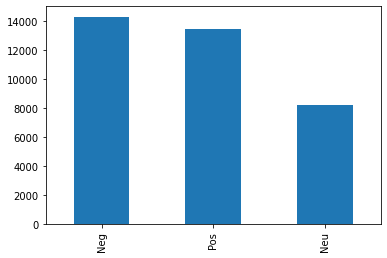

In [24]:
data['Category'].value_counts().plot(kind='bar')

In [25]:
data['Category'].value_counts()

Neg    14273
Pos    13427
Neu     8160
Name: Category, dtype: int64

In [29]:
# The dataset loooks nicely balanced for model building

## Encoding the target variable

### Encoding the category manually

In [38]:
data['Encoded_category'] = data['Category'].apply(lambda x: '0' if x=='Neu' else ('1' if x=='Pos' else '2'))

In [39]:
data['Encoded_category'].value_counts()

2    14273
1    13427
0     8160
Name: Encoded_category, dtype: int64

## Train Test Split

In [40]:
x=data['cleaned_description']
y=data['Encoded_category']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
xtrain.shape

(25102,)

In [45]:
xtest.shape

(10758,)

## Transforming the description column

In [53]:
# Using the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
xtrain_transform=tfidf.fit_transform(xtrain)
xtest_transform=tfidf.transform(xtest)

In [55]:
xtrain_transform

<25102x11290 sparse matrix of type '<class 'numpy.float64'>'
	with 244436 stored elements in Compressed Sparse Row format>

## Model Building

### Building a Support vector Machine classifier

In [68]:
svc=SVC(C=2,kernel='linear')
model=svc.fit(xtrain_transform,ytrain)
#------------------------------------
svc_prediction=model.predict(xtest_transform)

In [69]:
print(classification_report(ytest,svc_prediction))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2477
           1       0.89      0.86      0.88      4067
           2       0.90      0.85      0.88      4214

    accuracy                           0.87     10758
   macro avg       0.87      0.88      0.87     10758
weighted avg       0.88      0.87      0.87     10758



In [58]:
print(accuracy_score(ytest,svc_prediction))

0.8628927309908905


In [60]:
svc=SVC(kernel='rbf')
model=svc.fit(xtrain_transform,ytrain)
#------------------------------------
svc_prediction=model.predict(xtest_transform)

print(classification_report(ytest,svc_prediction))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      2477
           1       0.86      0.84      0.85      4067
           2       0.86      0.84      0.85      4214

    accuracy                           0.84     10758
   macro avg       0.83      0.83      0.83     10758
weighted avg       0.84      0.84      0.84     10758



In [61]:
#Trying out RandomForest Algorithm

In [62]:
rf=RandomForestClassifier(n_estimators=90)

model=rf.fit(xtrain_transform,ytrain)

rf_prediction=model.predict(xtest_transform)

print(classification_report(ytest,rf_prediction))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      2477
           1       0.85      0.84      0.84      4067
           2       0.89      0.80      0.84      4214

    accuracy                           0.84     10758
   macro avg       0.83      0.84      0.83     10758
weighted avg       0.84      0.84      0.84     10758



## Creating a pipeline 

In [70]:
from sklearn.pipeline import Pipeline

In [71]:
proj_pipeline = Pipeline([('tfidf',TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')),('svc',SVC(C=2,kernel='linear'))])

In [72]:
proj_pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')),
                ('svc', SVC(C=2, kernel='linear'))])

In [81]:
new_sentence="2024 has been a HAPPY year for many Indians."

In [82]:
proj_pipeline.predict([new_sentence])

array(['1'], dtype=object)